### Matriz de transición

### Descripción del problema a tratar: Simular en Python un recorrido a través del grafo del Ejercicio 5, mediante una matriz de probabilidades de transición. Asumimos que el recorrido siempre comienza en el nodo A. No se puede regresar (sólo avanzar de una letra a una de mayor o igual valor)

In [2]:
import numpy as np
p = 0.1
#p = 0.5
#p = 0.9
matriz_transiciones= np.array([[p, (1-p)/2, (1-p)/2, 0, 0, 0, 0, 0, 0, 0,],
                    [0, p, 0, 1-p, 0, 0, 0, 0, 0, 0,],
                    [0, 0, p, 1-p, 0, 0, 0, 0, 0, 0,],
                    [0, 0, 0, p, (1-p)/2, 0, 0, (1-p)/2, 0, 0,],
                    [0, 0, 0, 0, p, (1-p)/3, 0, 0, (1-p)/3, (1-p)/3,],
                    [0, 0, 0, 0, 0, p, 1-p, 0, 0, 0,],
                    [0, 0, 0, 0, 0, 0, p, 0, 1-p, 0,],
                    [0, 0, 0, 0, 0, 0, 0, p, 0, 1-p,],
                    [0, 0, 0, 0, 0, 0, 0, 0, p, 1-p,],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1,]])
print(p)
print(matriz_transiciones)

0.1
[[0.1  0.45 0.45 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.1  0.   0.9  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.1  0.9  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.1  0.45 0.   0.   0.45 0.   0.  ]
 [0.   0.   0.   0.   0.1  0.3  0.   0.   0.3  0.3 ]
 [0.   0.   0.   0.   0.   0.1  0.9  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.1  0.   0.9  0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.1  0.   0.9 ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.1  0.9 ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]]


## Ejercicio 1

### Descripción:  La distribución del número de pasos necesarios para llegar por primera vez al nodo J.

12


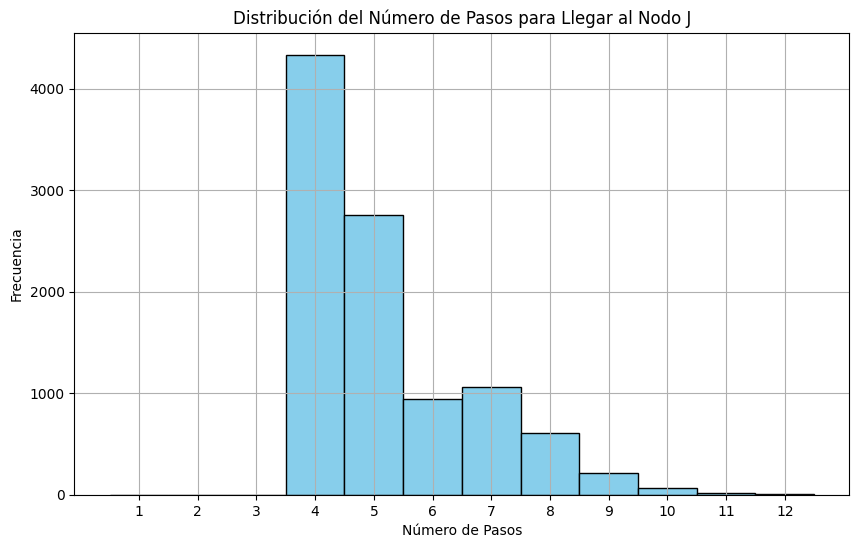

In [3]:
import matplotlib.pyplot as plt
def simular_hasta_J(matriz_transiciones, nodo_inicial=0, nodo_final=9):
    current_node = nodo_inicial
    steps = 0
    while current_node != nodo_final:
        steps += 1
        current_node = np.random.choice(np.arange(matriz_transiciones.shape[1]), p=matriz_transiciones[current_node])
    return steps

# Realizar N simulaciones
N = 10000  # Puedes ajustar este número según la capacidad de cálculo
pasos_hasta_J = [simular_hasta_J(matriz_transiciones) for _ in range(N)]
maximo = max(pasos_hasta_J)
print(maximo)
# Visualizar la distribución
plt.figure(figsize=(10, 6))
plt.hist(pasos_hasta_J, bins=range(1, max(pasos_hasta_J) + 2), align='left', color='skyblue', edgecolor='black')
plt.title('Distribución del Número de Pasos para Llegar al Nodo J')
plt.xlabel('Número de Pasos')
plt.ylabel('Frecuencia')
plt.xticks(range(1, max(pasos_hasta_J) + 1))
plt.grid(True)
plt.show()

## Ejercicio 2

### Descripción: La distribución de posiciones en los nodos después de M movimientos. Probar para un valor muy grande de N
experimentos y M movimientos. Este es el llamado estado estacionario de la cadena de Markov.


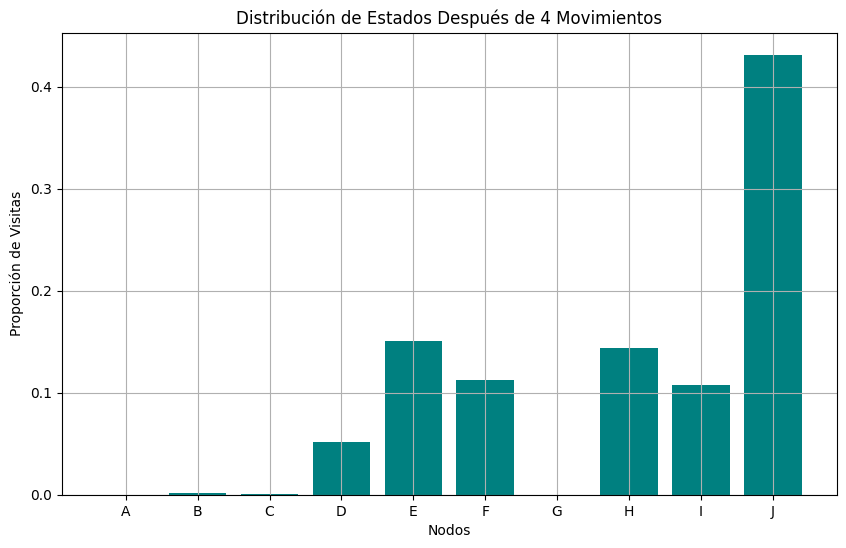

In [5]:
def distribucion_despues_de_M_movimientos(matriz_transiciones, M, N=10000):
    estados_finales = np.zeros(matriz_transiciones.shape[0])
    for _ in range(N):
        current_node = 0  # Nodo inicial A
        for _ in range(M):
            current_node = np.random.choice(np.arange(matriz_transiciones.shape[1]), p=matriz_transiciones[current_node])
        estados_finales[current_node] += 1
    return estados_finales / N

M = 4  # Número grande de movimientos para aproximarse al estado estacionario
distribucion_estacionaria = distribucion_despues_de_M_movimientos(matriz_transiciones, M)

# Visualización
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), distribucion_estacionaria, color='teal')
plt.title('Distribución de Estados Después de {} Movimientos'.format(M))
plt.xlabel('Nodos')
plt.ylabel('Proporción de Visitas')
plt.xticks(range(1, 11), ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.grid(True)
plt.show()